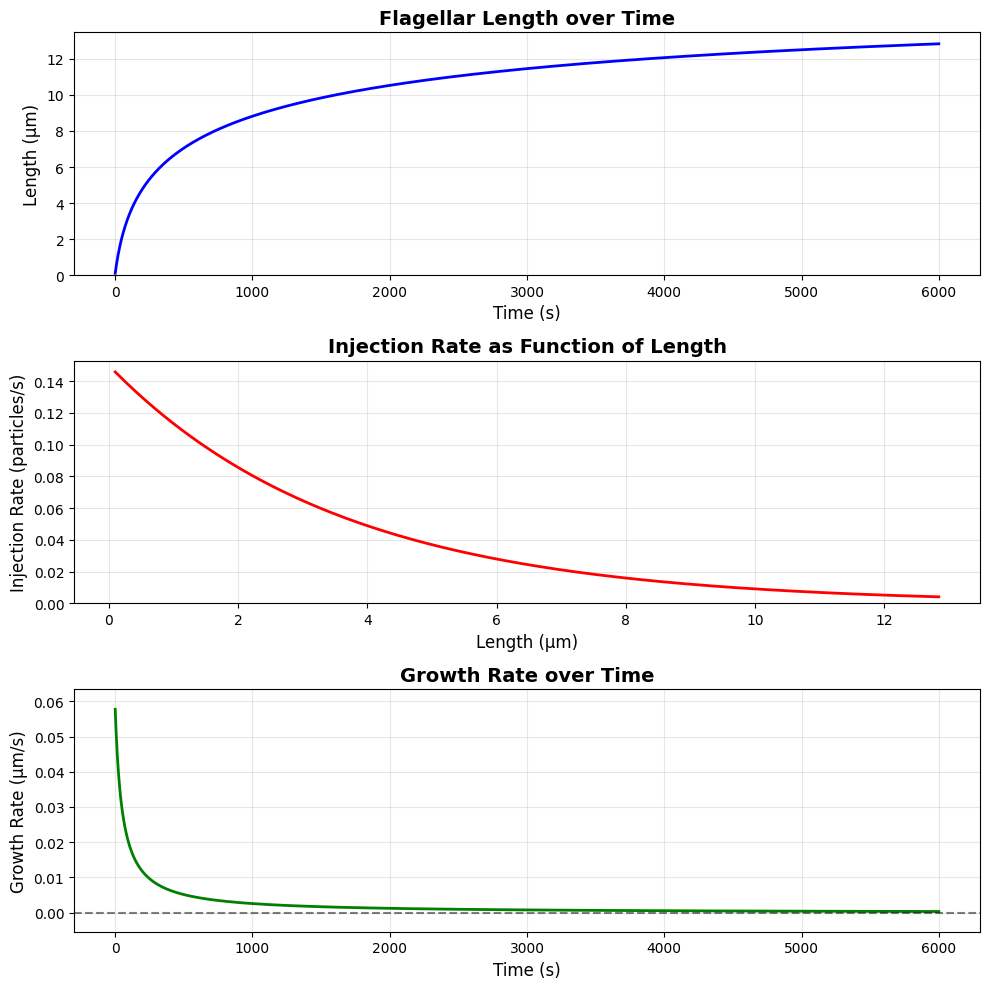

FLAGELLAR GROWTH MODEL RESULTS

Parameters:
  δ (delta): 0.01
  D (disassembly rate): 0.0003
  P (pool size): 40.0
  M (max growth rate): 0.15
  k_cat: 0.7
  v (particle speed): 5.0

Initial length: 0.1
Final length (t=6000.0): 12.841
Approximate steady-state length: 12.841
Final growth rate: 0.000289


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters - Adjusted for much slower steady state approach
delta = 0.01     # Proportionality constant (elongation per injected particle)
D = 0.0003       # Disassembly rate
P = 40.0         # Total pool size
M = 0.15         # Maximum growth rate
k_cat = 0.7    # Rate constant for modification
v = 5.0          # Speed of particle

def injection_rate(L, M, k_cat, v):
    """
    Calculate the injection rate r as a function of length L
    r = M * exp(-2*k_cat*L/v)
    """
    return M * np.exp(-2 * k_cat * L / v)

def flagellar_growth(L, t, delta, D, P, M, k_cat, v):
    """
    Differential equation for flagellar growth
    dL/dt = delta * r * (P - 2L) - D
    where r = M * exp(-2*k_cat*L/v)
    """
    r = injection_rate(L, M, k_cat, v)
    dL_dt = delta * r * (P - 2*L) - D
    return dL_dt

# Initial conditions
L0 = 0.1  # Initial length - REDUCED for more dramatic growth curve

# Time points - Extended time for much slower dynamics
t = np.linspace(0, 6000, 2000)

# Solve ODE
L_solution = odeint(flagellar_growth, L0, t, args=(delta, D, P, M, k_cat, v))

# Calculate injection rate over time
r_over_time = injection_rate(L_solution.flatten(), M, k_cat, v)

# Calculate growth rate dL/dt over time
dL_dt_over_time = delta * r_over_time * (P - 2*L_solution.flatten()) - D

# Create plots
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plot 1: Length vs Time
axes[0].plot(t, L_solution, 'b-', linewidth=2)
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Length (μm)', fontsize=12)
axes[0].set_title('Flagellar Length over Time', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, None])  # Start y-axis at 0

# Plot 2: Injection Rate vs Length
axes[1].plot(L_solution, r_over_time, 'r-', linewidth=2)
axes[1].set_xlabel('Length (μm)', fontsize=12)
axes[1].set_ylabel('Injection Rate (particles/s)', fontsize=12)
axes[1].set_title('Injection Rate as Function of Length', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, None])  # Start y-axis at 0

# Plot 3: Growth Rate vs Time
axes[2].plot(t, dL_dt_over_time, 'g-', linewidth=2)
axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
axes[2].set_xlabel('Time (s)', fontsize=12)
axes[2].set_ylabel('Growth Rate (μm/s)', fontsize=12)
axes[2].set_title('Growth Rate over Time', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
# Center y-axis around the data range
y_margin = (max(dL_dt_over_time) - min(dL_dt_over_time)) * 0.1
axes[2].set_ylim([min(dL_dt_over_time) - y_margin, max(dL_dt_over_time) + y_margin])

plt.tight_layout()
plt.show()

# Find steady-state length (where dL/dt ≈ 0)
steady_state_idx = np.argmin(np.abs(dL_dt_over_time[-100:]))
steady_state_length = L_solution[-100:][steady_state_idx]

print("=" * 50)
print("FLAGELLAR GROWTH MODEL RESULTS")
print("=" * 50)
print(f"\nParameters:")
print(f"  δ (delta): {delta}")
print(f"  D (disassembly rate): {D}")
print(f"  P (pool size): {P}")
print(f"  M (max growth rate): {M}")
print(f"  k_cat: {k_cat}")
print(f"  v (particle speed): {v}")
print(f"\nInitial length: {L0}")
print(f"Final length (t={t[-1]}): {L_solution[-1][0]:.3f}")
print(f"Approximate steady-state length: {steady_state_length[0]:.3f}")
print(f"Final growth rate: {dL_dt_over_time[-1]:.6f}")
print("=" * 50)

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Parameters
delta = 0.01     # Proportionality constant (elongation per injected particle)
D = 0.0003       # Disassembly rate
P = 40.0         # Total pool size
M = 0.15         # Maximum growth rate
k_cat = 0.7      # Rate constant for modification
v = 5.0          # Speed of particle
L0 = 0.1         # Initial length
t_max = 3000     # Maximum time

def injection_rate(L, M, k_cat, v):
    """
    Calculate the injection rate r as a function of length L
    r = M * exp(-2*k_cat*L/v)
    """
    return M * np.exp(-2 * k_cat * L / v)

def flagellar_growth(L, t, f_tubulin, delta, D, P, M, k_cat, v):
    """
    Differential equation for flagellar growth
    dL/dt = f_tubulin * delta * r * (P - 2L) - D
    where r = M * exp(-2*k_cat*L/v)
    and f_tubulin is the fraction of IFT particles carrying tubulin
    """
    r = injection_rate(L, M, k_cat, v)
    dL_dt = f_tubulin * delta * r * (P - 2*L) - D
    return dL_dt

def plot_comparison(f_tubulin=0.5):
    """
    Plot comparison between current model (with f_tubulin) and original model (f_tubulin=1)
    """
    # Time points
    t = np.linspace(0, t_max, 1000)

    # Solve for current model with given f_tubulin
    L_current = odeint(flagellar_growth, L0, t, args=(f_tubulin, delta, D, P, M, k_cat, v))

    # Solve for original model with f_tubulin = 1.0
    L_original = odeint(flagellar_growth, L0, t, args=(1.0, delta, D, P, M, k_cat, v))

    # Calculate injection rates
    r_current = injection_rate(L_current.flatten(), M, k_cat, v)

    # Calculate growth rates
    dL_dt_current = f_tubulin * delta * r_current * (P - 2*L_current.flatten()) - D
    dL_dt_original = 1.0 * delta * r_current * (P - 2*L_original.flatten()) - D

    # Find steady-state lengths
    steady_state_current = L_current[-1][0]
    steady_state_original = L_original[-1][0]

    # Create figure with 3 subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))

    # Plot 1: Length vs Time
    axes[0].plot(t, L_current, 'b-', linewidth=2.5, label=f'Current (f={f_tubulin:.2f})')
    axes[0].plot(t, L_original, 'g--', linewidth=2.5, label='Original (f=1.00)')
    axes[0].set_xlabel('Time (s)', fontsize=13)
    axes[0].set_ylabel('Length (μm)', fontsize=13)
    axes[0].set_title('Flagellar Length over Time', fontsize=15, fontweight='bold')
    axes[0].legend(fontsize=11, loc='lower right')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim([0, None])

    # Add steady-state annotations
    axes[0].text(0.02, 0.98, f'Steady-state (f={f_tubulin:.2f}): {steady_state_current:.2f} μm',
                transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    axes[0].text(0.02, 0.88, f'Steady-state (f=1.00): {steady_state_original:.2f} μm',
                transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

    # Plot 2: Injection Rate vs Length
    L_range = np.linspace(0, 20, 200)
    r_range = injection_rate(L_range, M, k_cat, v)
    axes[1].plot(L_range, r_range, 'r-', linewidth=2.5)
    axes[1].set_xlabel('Length (μm)', fontsize=13)
    axes[1].set_ylabel('Injection Rate (particles/s)', fontsize=13)
    axes[1].set_title('Injection Rate as Function of Length', fontsize=15, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([0, None])
    axes[1].text(0.98, 0.98, 'Note: Same for both models',
                transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

    # Plot 3: Growth Rate vs Time
    axes[2].plot(t, dL_dt_current, 'b-', linewidth=2.5, label=f'Current (f={f_tubulin:.2f})')
    axes[2].plot(t, dL_dt_original, 'g--', linewidth=2.5, label='Original (f=1.00)')
    axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[2].set_xlabel('Time (s)', fontsize=13)
    axes[2].set_ylabel('Growth Rate (μm/s)', fontsize=13)
    axes[2].set_title('Growth Rate over Time', fontsize=15, fontweight='bold')
    axes[2].legend(fontsize=11, loc='upper right')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print summary
    print("=" * 60)
    print("FLAGELLAR GROWTH MODEL COMPARISON")
    print("=" * 60)
    print(f"\nParameters:")
    print(f"  δ (delta): {delta}")
    print(f"  D (disassembly rate): {D}")
    print(f"  P (pool size): {P}")
    print(f"  M (max growth rate): {M}")
    print(f"  k_cat: {k_cat}")
    print(f"  v (particle speed): {v}")
    print(f"  L0 (initial length): {L0} μm")
    print(f"\nCurrent Model (f_tubulin = {f_tubulin:.2f}):")
    print(f"  Steady-state length: {steady_state_current:.3f} μm")
    print(f"  Final growth rate: {dL_dt_current[-1]:.6f} μm/s")
    print(f"\nOriginal Model (f_tubulin = 1.00):")
    print(f"  Steady-state length: {steady_state_original:.3f} μm")
    print(f"  Final growth rate: {dL_dt_original[-1]:.6f} μm/s")
    print(f"\nDifference in steady-state length: {steady_state_original - steady_state_current:.3f} μm")
    print("=" * 60)

# Create interactive slider
print("Adjust the slider to change f_tubulin (fraction of IFT particles carrying tubulin)")
print("f_tubulin = 0: No particles carry tubulin")
print("f_tubulin = 1: All particles carry tubulin (original model)\n")

interact(plot_comparison,
         f_tubulin=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.5,
                              description='f_tubulin:',
                              style={'description_width': 'initial'},
                              layout=widgets.Layout(width='600px')))

Adjust the slider to change f_tubulin (fraction of IFT particles carrying tubulin)
f_tubulin = 0: No particles carry tubulin
f_tubulin = 1: All particles carry tubulin (original model)



interactive(children=(FloatSlider(value=0.5, description='f_tubulin:', layout=Layout(width='600px'), max=1.0, …

<function __main__.plot_comparison(f_tubulin=0.5)>

Calculating solutions for animation...
Creating animation...
Animation complete! Displaying...


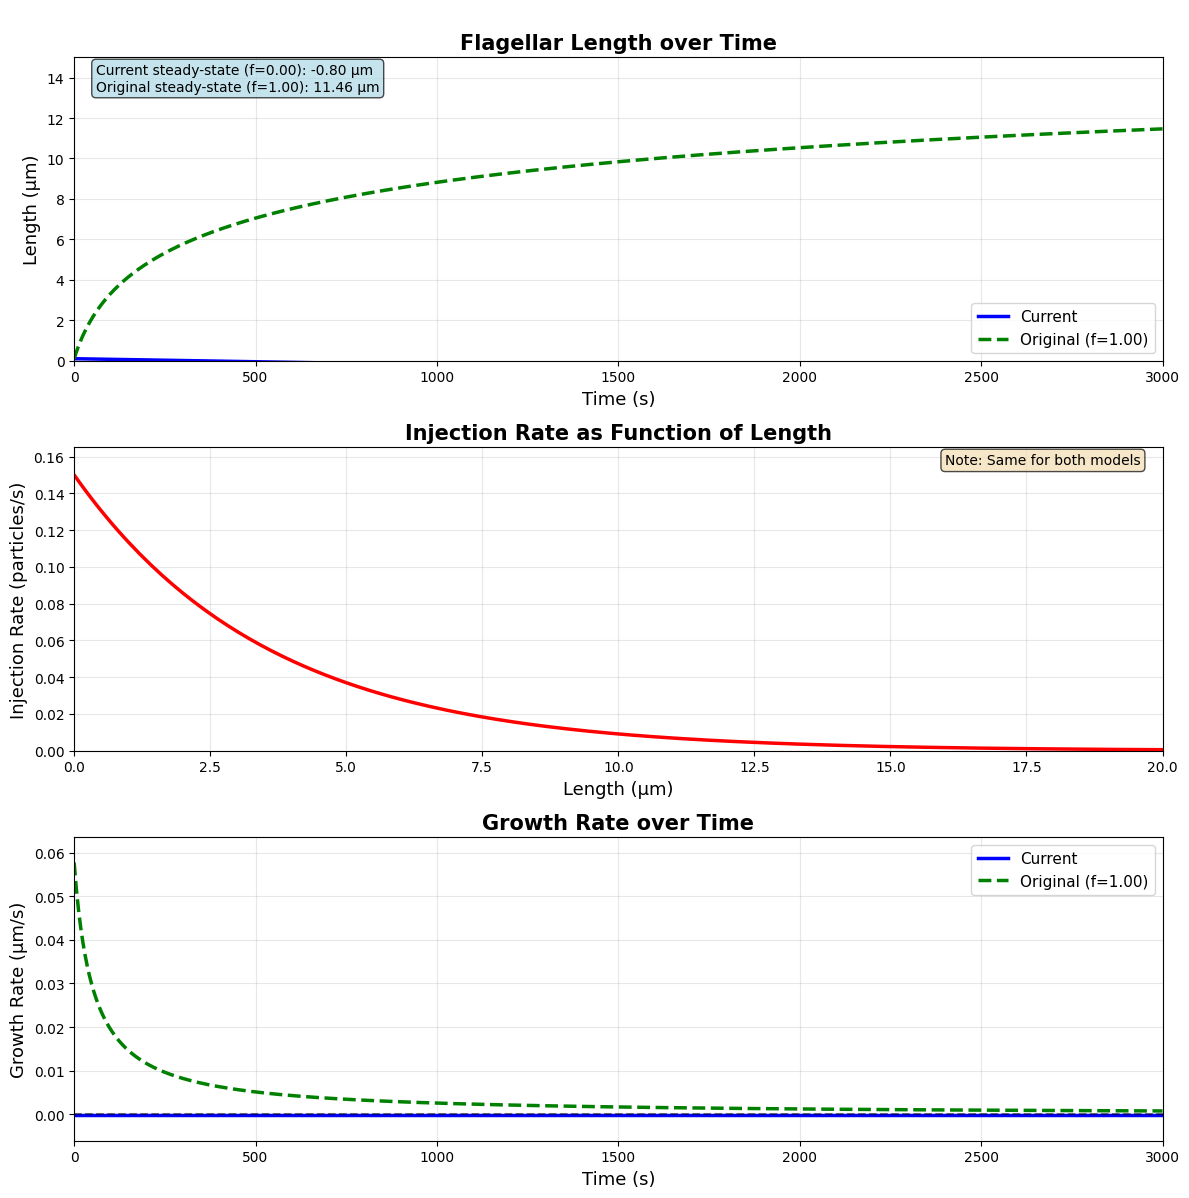

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parameters
delta = 0.01     # Proportionality constant (elongation per injected particle)
D = 0.0003       # Disassembly rate
P = 40.0         # Total pool size
M = 0.15         # Maximum growth rate
k_cat = 0.7      # Rate constant for modification
v = 5.0          # Speed of particle
L0 = 0.1         # Initial length
t_max = 3000     # Maximum time

def injection_rate(L, M, k_cat, v):
    """
    Calculate the injection rate r as a function of length L
    r = M * exp(-2*k_cat*L/v)
    """
    return M * np.exp(-2 * k_cat * L / v)

def flagellar_growth(L, t, f_tubulin, delta, D, P, M, k_cat, v):
    """
    Differential equation for flagellar growth
    dL/dt = f_tubulin * delta * r * (P - 2L) - D
    where r = M * exp(-2*k_cat*L/v)
    and f_tubulin is the fraction of IFT particles carrying tubulin
    """
    r = injection_rate(L, M, k_cat, v)
    dL_dt = f_tubulin * delta * r * (P - 2*L) - D
    return dL_dt

# Pre-calculate solutions for different f_tubulin values
print("Calculating solutions for animation...")
t = np.linspace(0, t_max, 1000)
f_tubulin_values = np.linspace(1.0, 0.0, 100)  # From 1.0 to 0.0
solutions = {}

# Always calculate original model (f=1.0)
L_original = odeint(flagellar_growth, L0, t, args=(1.0, delta, D, P, M, k_cat, v))

for f_tub in f_tubulin_values:
    L_solution = odeint(flagellar_growth, L0, t, args=(f_tub, delta, D, P, M, k_cat, v))
    r_solution = injection_rate(L_solution.flatten(), M, k_cat, v)
    dL_dt_solution = f_tub * delta * r_solution * (P - 2*L_solution.flatten()) - D

    solutions[f_tub] = {
        'L': L_solution,
        'r': r_solution,
        'dL_dt': dL_dt_solution
    }

print("Creating animation...")

# Create figure
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Initialize plots
line_current, = axes[0].plot([], [], 'b-', linewidth=2.5, label='Current')
line_original, = axes[0].plot([], [], 'g--', linewidth=2.5, label='Original (f=1.00)')
axes[0].set_xlim(0, t_max)
axes[0].set_ylim(0, max(L_original.max() * 1.1, 15))
axes[0].set_xlabel('Time (s)', fontsize=13)
axes[0].set_ylabel('Length (μm)', fontsize=13)
axes[0].set_title('Flagellar Length over Time', fontsize=15, fontweight='bold')
axes[0].legend(fontsize=11, loc='lower right')
axes[0].grid(True, alpha=0.3)
text_steady = axes[0].text(0.02, 0.98, '', transform=axes[0].transAxes, fontsize=10,
                          verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Injection rate plot
L_range = np.linspace(0, 20, 200)
r_range = injection_rate(L_range, M, k_cat, v)
axes[1].plot(L_range, r_range, 'r-', linewidth=2.5)
axes[1].set_xlim(0, 20)
axes[1].set_ylim(0, r_range.max() * 1.1)
axes[1].set_xlabel('Length (μm)', fontsize=13)
axes[1].set_ylabel('Injection Rate (particles/s)', fontsize=13)
axes[1].set_title('Injection Rate as Function of Length', fontsize=15, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].text(0.98, 0.98, 'Note: Same for both models',
            transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# Growth rate plot
line_growth_current, = axes[2].plot([], [], 'b-', linewidth=2.5, label='Current')
line_growth_original, = axes[2].plot([], [], 'g--', linewidth=2.5, label='Original (f=1.00)')
axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.5)
axes[2].set_xlim(0, t_max)
axes[2].set_xlabel('Time (s)', fontsize=13)
axes[2].set_ylabel('Growth Rate (μm/s)', fontsize=13)
axes[2].set_title('Growth Rate over Time', fontsize=15, fontweight='bold')
axes[2].legend(fontsize=11, loc='upper right')
axes[2].grid(True, alpha=0.3)

# Add main title with f_tubulin value
title_text = fig.suptitle('', fontsize=18, fontweight='bold', y=0.995)

# Calculate growth rate for original model
r_original = injection_rate(L_original.flatten(), M, k_cat, v)
dL_dt_original = 1.0 * delta * r_original * (P - 2*L_original.flatten()) - D

# Set y-limits for growth rate
all_growth_rates = [dL_dt_original]
for sol in solutions.values():
    all_growth_rates.append(sol['dL_dt'])
all_growth_rates = np.concatenate(all_growth_rates)
y_margin = (all_growth_rates.max() - all_growth_rates.min()) * 0.1
axes[2].set_ylim(all_growth_rates.min() - y_margin, all_growth_rates.max() + y_margin)

plt.tight_layout()

def init():
    line_current.set_data([], [])
    line_original.set_data([], [])
    line_growth_current.set_data([], [])
    line_growth_original.set_data([], [])
    text_steady.set_text('')
    title_text.set_text('')
    return line_current, line_original, line_growth_current, line_growth_original, text_steady, title_text

def animate(frame):
    f_tub = f_tubulin_values[frame]

    # Get solution for current f_tubulin
    sol = solutions[f_tub]
    L_current = sol['L']
    dL_dt_current = sol['dL_dt']

    # Update length plot
    line_current.set_data(t, L_current)
    line_original.set_data(t, L_original)

    # Update growth rate plot
    line_growth_current.set_data(t, dL_dt_current)
    line_growth_original.set_data(t, dL_dt_original)

    # Update text
    steady_state_current = L_current[-1][0]
    steady_state_original = L_original[-1][0]
    text_steady.set_text(f'Current steady-state (f={f_tub:.2f}): {steady_state_current:.2f} μm\n' +
                        f'Original steady-state (f=1.00): {steady_state_original:.2f} μm')

    # Update main title
    title_text.set_text(f'f_tubulin = {f_tub:.2f} (Fraction of IFT particles carrying tubulin)')

    return line_current, line_original, line_growth_current, line_growth_original, text_steady, title_text

# Create animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(f_tubulin_values),
                              interval=100, blit=True, repeat=True)

# Display animation in notebook
print("Animation complete! Displaying...")
HTML(anim.to_html5_video())

# To save as MP4 file (uncomment the line below)
# anim.save('flagellar_growth_animation.mp4', writer='ffmpeg', fps=10, dpi=100)

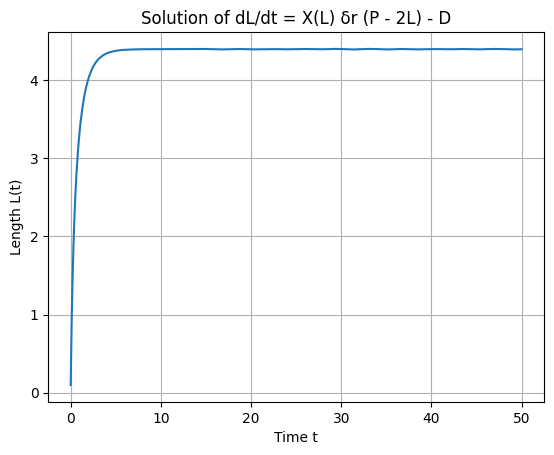

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
delta_r = 1.0   # δr
P = 10.0        # P
D = 0.5         # D
k = 0.2         # decay constant controlling how fast X decreases with L

# Define X(L)
def X(L):
    return np.exp(-k * L)  # always in (0,1), decreasing in L

# Differential equation dL/dt
def dLdt(t, L):
    return X(L) * delta_r * (P - 2*L) - D

# Initial condition
L0 = [0.1]

# Time span
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solve ODE
solution = solve_ivp(dLdt, t_span, L0, t_eval=t_eval)

# Plot
plt.plot(solution.t, solution.y[0])
plt.xlabel("Time t")
plt.ylabel("Length L(t)")
plt.title("Solution of dL/dt = X(L) δr (P - 2L) - D")
plt.grid(True)
plt.show()

X = lambda L: 1 / (1 + L)          # decreases, stays < 1
X = lambda L: 1 - np.tanh(L) / 2   # smooth, decreasing


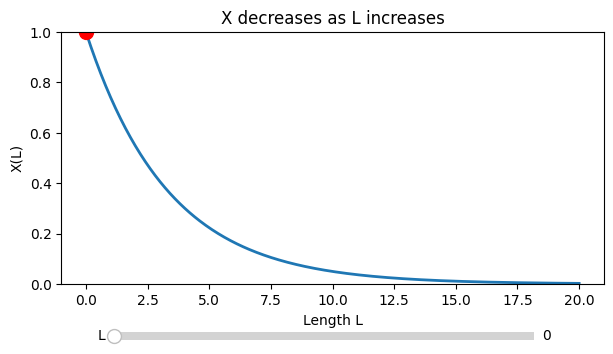

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# X(L) definition — decreases with L, stays in (0,1)
def X(L, k=0.3):
    return np.exp(-k*L)

# Create the figure
fig, ax = plt.subplots(figsize=(7,4))
plt.subplots_adjust(bottom=0.25)

L_values = np.linspace(0, 20, 400)
X_values = X(L_values)

line, = ax.plot(L_values, X_values, lw=2)
ax.set_xlabel("Length L")
ax.set_ylabel("X(L)")
ax.set_title("X decreases as L increases")
ax.set_ylim(0, 1)

# Slider axis
slider_ax = fig.add_axes([0.2, 0.1, 0.6, 0.04])
L_slider = Slider(slider_ax, 'L', 0, 20, valinit=0)

# Point showing current value
point, = ax.plot([0], [X(0)], 'ro', markersize=10)

def update(val):
    L = L_slider.val
    point.set_data([L], [X(L)])
    fig.canvas.draw_idle()

L_slider.on_changed(update)

plt.show()


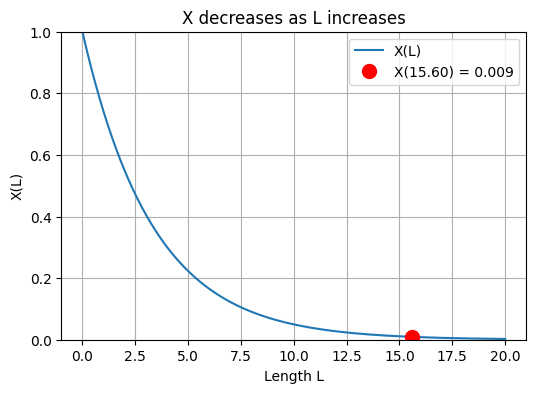

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# X(L) decreasing function
def X(L, k=0.3):
    return np.exp(-k * L)

# Slider-driven visualization
@interact(L=widgets.FloatSlider(value=0, min=0, max=20, step=0.1, description="Length L"))
def update(L):
    L_vals = np.linspace(0, 20, 400)
    X_vals = X(L_vals)

    plt.figure(figsize=(6,4))
    plt.plot(L_vals, X_vals, label="X(L)")
    plt.plot(L, X(L), 'ro', markersize=10, label=f"X({L:.2f}) = {X(L):.3f}")

    plt.ylim(0, 1)
    plt.xlabel("Length L")
    plt.ylabel("X(L)")
    plt.title("X decreases as L increases")
    plt.grid(True)
    plt.legend()
    plt.show()



In [ ]:
!pip install -q plotly

import numpy as np
import plotly.graph_objects as go

# Parameters
k = 0.3                       # controls how fast X decreases with L
L_min, L_max = 0.0, 20.0
n_frames = 240

# X(L): fraction of IFT particles carrying growth-permitting cargo
def X(L):
    return np.exp(-k * L)  # decays with length

L_vals = np.linspace(L_min, L_max, n_frames)
X_vals = X(L_vals)

# Static curve
line = go.Scatter(
    x=L_vals,
    y=X_vals,
    mode='lines',
    name='X(L): Fraction of cargo-carrying IFT particles'
)

# Moving point
point = go.Scatter(
    x=[L_vals[0]],
    y=[X_vals[0]],
    mode='markers',
    marker=dict(size=12, color='red'),
    name='Current X(L)'
)

# Frames for animation
frames = [
    go.Frame(
        data=[
            go.Scatter(x=L_vals, y=X_vals),
            go.Scatter(x=[L_vals[i]], y=[X_vals[i]], marker=dict(size=12, color='red'))
        ],
        name=str(i)
    )
    for i in range(n_frames)
]

# Slider steps
slider_steps = [
    dict(
        method="animate",
        args=[[str(i)], dict(mode="immediate", frame=dict(duration=0, redraw=True))],
        label=f"{L_vals[i]:.2f}"
    )
    for i in range(0, n_frames, max(1, n_frames // 40))
]

# Build figure
fig = go.Figure(
    data=[line, point],
    frames=frames,
    layout=go.Layout(
        title=(
            "Flagellar Growth Biology<br>"
            "<sup>X(L) = Fraction of IFT trains with growth-permitting cargo</sup>"
        ),
        xaxis=dict(
            title="Flagellar Length L (µm)",
            range=[L_min, L_max]
        ),
        yaxis=dict(
            title="X(L) — Fraction of Cargo-Bearing IFT Particles",
            range=[0, 1.05]
        ),
        sliders=[dict(active=0, pad={"t": 50}, steps=slider_steps)],
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                y=1.05, x=1.02,
                xanchor="right", yanchor="top",
                buttons=[
                    dict(label="Play",
                         method="animate",
                         args=[None, {"frame": {"duration": 40, "redraw": True},
                                      "fromcurrent": True}]),
                    dict(label="Pause",
                         method="animate",
                         args=[[None],
                               {"frame": {"duration": 0, "redraw": False},
                                "mode": "immediate"}])
                ]
            )
        ],
        width=800,
        height=500
    )
)

fig.show()
fig.write_html("flagella_animation.html")




In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Parameters
delta = 0.01     # Proportionality constant (elongation per injected particle)
D = 0.0003       # Disassembly rate
P = 40.0         # Total pool size
M = 0.15         # Maximum growth rate
k_cat = 0.7      # Rate constant for modification
v = 5.0          # Speed of particle
L0 = 0.1         # Initial length
t_max = 3000     # Maximum time

def injection_rate(L, M, k_cat, v):
    """
    Calculate the injection rate r as a function of length L
    r = M * exp(-2*k_cat*L/v)
    """
    return M * np.exp(-2 * k_cat * L / v)

def X_function(L, k):
    """
    Cargo loss function: X(L) = exp(-k*L)
    Represents the fraction of IFT trains that retain growth-cargo
    as a function of flagellar length
    k: measures how quickly IFT trains lose their growth-cargo
    """
    return np.exp(-k * L)

def flagellar_growth(L, t, k, delta, D, P, M, k_cat, v):
    """
    Differential equation for flagellar growth with cargo loss
    dL/dt = X(L) * delta * r * (P - 2L) - D
    where:
      X(L) = exp(-k*L) is the cargo retention function
      r = M * exp(-2*k_cat*L/v) is the injection rate
    """
    X_L = X_function(L, k)
    r = injection_rate(L, M, k_cat, v)
    dL_dt = X_L * delta * r * (P - 2*L) - D
    return dL_dt

def plot_model(k=0.1):
    """
    Plot flagellar growth model with cargo loss function X(L) = exp(-k*L)
    """
    # Time points
    t = np.linspace(0, t_max, 1000)

    # Solve ODE with cargo loss
    L_solution = odeint(flagellar_growth, L0, t, args=(k, delta, D, P, M, k_cat, v))

    # Solve original model (k=0, which gives X(L)=1)
    L_original = odeint(flagellar_growth, L0, t, args=(0.0, delta, D, P, M, k_cat, v))

    # Calculate derived quantities
    r_solution = injection_rate(L_solution.flatten(), M, k_cat, v)
    X_solution = X_function(L_solution.flatten(), k)
    dL_dt_solution = X_solution * delta * r_solution * (P - 2*L_solution.flatten()) - D

    # Original model quantities
    r_original = injection_rate(L_original.flatten(), M, k_cat, v)
    X_original = X_function(L_original.flatten(), 0.0)
    dL_dt_original = X_original * delta * r_original * (P - 2*L_original.flatten()) - D

    # Find steady-state lengths
    steady_state_current = L_solution[-1][0]
    steady_state_original = L_original[-1][0]

    # Create figure with 5 subplots
    fig, axes = plt.subplots(5, 1, figsize=(12, 18))

    # Plot 1: Length vs Time
    axes[0].plot(t, L_solution, 'b-', linewidth=2.5, label=f'With cargo loss (k={k:.3f})')
    axes[0].plot(t, L_original, 'g--', linewidth=2.5, label='Original (k=0)')
    axes[0].set_xlabel('Time (s)', fontsize=13)
    axes[0].set_ylabel('Length (μm)', fontsize=13)
    axes[0].set_title('Flagellar Length over Time', fontsize=15, fontweight='bold')
    axes[0].legend(fontsize=11, loc='lower right')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim([0, None])

    # Add steady-state annotations
    axes[0].text(0.02, 0.98, f'Steady-state (k={k:.3f}): {steady_state_current:.2f} μm',
                transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    axes[0].text(0.02, 0.88, f'Steady-state (k=0): {steady_state_original:.2f} μm',
                transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

    # Plot 2: Cargo retention function X(L)
    L_range = np.linspace(0, 20, 200)
    X_range = X_function(L_range, k)
    axes[1].plot(L_range, X_range, 'purple', linewidth=2.5)
    axes[1].set_xlabel('Length (μm)', fontsize=13)
    axes[1].set_ylabel('X(L) = exp(-kL)', fontsize=13)
    axes[1].set_title('Cargo Retention Function', fontsize=15, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([0, 1.05])
    axes[1].text(0.98, 0.98, f'k = {k:.3f}\nFraction of IFT trains\nretaining cargo',
                transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='plum', alpha=0.7))

    # Plot 3: Injection Rate vs Length
    r_range = injection_rate(L_range, M, k_cat, v)
    axes[2].plot(L_range, r_range, 'r-', linewidth=2.5)
    axes[2].set_xlabel('Length (μm)', fontsize=13)
    axes[2].set_ylabel('Injection Rate (particles/s)', fontsize=13)
    axes[2].set_title('Injection Rate as Function of Length', fontsize=15, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    axes[2].set_ylim([0, None])

    # Plot 4: Growth Rate vs Time
    axes[3].plot(t, dL_dt_solution, 'b-', linewidth=2.5, label=f'With cargo loss (k={k:.3f})')
    axes[3].plot(t, dL_dt_original, 'g--', linewidth=2.5, label='Original (k=0)')
    axes[3].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[3].set_xlabel('Time (s)', fontsize=13)
    axes[3].set_ylabel('Growth Rate (μm/s)', fontsize=13)
    axes[3].set_title('Growth Rate over Time', fontsize=15, fontweight='bold')
    axes[3].legend(fontsize=11, loc='upper right')
    axes[3].grid(True, alpha=0.3)

    # Plot 5: Growth Rate vs Length
    axes[4].plot(L_solution.flatten(), dL_dt_solution, 'b-', linewidth=2.5,
                label=f'With cargo loss (k={k:.3f})')
    axes[4].plot(L_original.flatten(), dL_dt_original, 'g--', linewidth=2.5,
                label='Original (k=0)')
    axes[4].axhline(y=0, color='k', linestyle='--', alpha=0.5)
    axes[4].set_xlabel('Length (μm)', fontsize=13)
    axes[4].set_ylabel('Growth Rate (μm/s)', fontsize=13)
    axes[4].set_title('Growth Rate as Function of Length', fontsize=15, fontweight='bold')
    axes[4].legend(fontsize=11, loc='upper right')
    axes[4].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print summary
    print("=" * 70)
    print("FLAGELLAR GROWTH MODEL WITH CARGO LOSS")
    print("=" * 70)
    print(f"\nModel equation: dL/dt = X(L) * δ * r * (P - 2L) - D")
    print(f"where X(L) = exp(-k*L) is the cargo retention function")
    print(f"\nParameters:")
    print(f"  k (cargo loss rate): {k:.3f}")
    print(f"  δ (delta): {delta}")
    print(f"  D (disassembly rate): {D}")
    print(f"  P (pool size): {P}")
    print(f"  M (max growth rate): {M}")
    print(f"  k_cat: {k_cat}")
    print(f"  v (particle speed): {v}")
    print(f"  L0 (initial length): {L0} μm")
    print(f"\nWith cargo loss (k={k:.3f}):")
    print(f"  Steady-state length: {steady_state_current:.3f} μm")
    print(f"  Final growth rate: {dL_dt_solution[-1]:.6f} μm/s")
    print(f"  X(L) at steady-state: {X_function(steady_state_current, k):.4f}")
    print(f"\nOriginal model (k=0, no cargo loss):")
    print(f"  Steady-state length: {steady_state_original:.3f} μm")
    print(f"  Final growth rate: {dL_dt_original[-1]:.6f} μm/s")
    print(f"\nDifference in steady-state length: {steady_state_original - steady_state_current:.3f} μm")
    print("=" * 70)

# Create interactive slider
print("=" * 70)
print("INTERACTIVE FLAGELLAR GROWTH MODEL")
print("=" * 70)
print("\nModel: dL/dt = X(L) * δ * r * (P - 2L) - D")
print("where X(L) = exp(-k*L) represents cargo retention")
print("\nAdjust k to see how cargo loss affects flagellar growth:")
print("  k = 0: No cargo loss (original model)")
print("  k > 0: IFT trains lose cargo as flagellum elongates")
print("  Higher k: Faster cargo loss with length\n")

interact(plot_model,
         k=FloatSlider(min=0.0, max=0.5, step=0.01, value=0.1,
                      description='k (cargo loss):',
                      style={'description_width': 'initial'},
                      layout=widgets.Layout(width='600px')))

INTERACTIVE FLAGELLAR GROWTH MODEL

Model: dL/dt = X(L) * δ * r * (P - 2L) - D
where X(L) = exp(-k*L) represents cargo retention

Adjust k to see how cargo loss affects flagellar growth:
  k = 0: No cargo loss (original model)
  k > 0: IFT trains lose cargo as flagellum elongates
  Higher k: Faster cargo loss with length



interactive(children=(FloatSlider(value=0.1, description='k (cargo loss):', layout=Layout(width='600px'), max=…

<function __main__.plot_model(k=0.1)>